## Classifier-free guidance (for class-aware data augmentation)

In [10]:
import importlib
from pathlib import Path
import sys
sys.path.append('..')
import time

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.optim import Adam
import torchvision

from src.diffusion import classifier_free_guidance as cfg
from src import trainhelper as th
from src import dataset
from src import viz

importlib.reload(th)
importlib.reload(dataset)
importlib.reload(viz)

<module 'src.viz' from '/home/nashir/Documents/UCF/spring2023/cap5516/final-project/notebooks/../src/viz.py'>

## Load downscaled and normalized images

In [11]:
datadir = "../data/chest_xray"
batch_size = 8
dataloaders, dataset_sizes, class_names = dataset.load_downscaled_xray_data(datadir, for_diffusion=True, batch_size=batch_size, return_val_set=False, load_as_rgb=False)
# dataloaders, dataset_sizes, class_names = dataset.load_xray_data(datadir, return_val_set=False, batch_size=8, load_as_rgb=False)
# # Compute approximate mean and std of train dataset based on a single batch
# images, _ = next(iter(dataloaders['train']))
# # shape of images = [b,c,w,h]
# mean, std = images.mean([0,2,3]), images.std([0,2,3])
# # Reload downscaled dataset with mean and std computed above
# transform = dataset.get_downscale_transforms_for_diffusion(mean, std, load_as_rgb=False)
# dataloaders, dataset_sizes, class_names = dataset.load_xray_data(datadir, transform, batch_size=4)

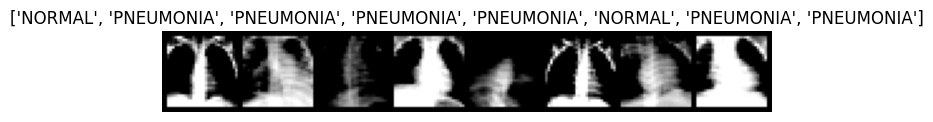

In [12]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

viz.imshow(out, 0, 1, title=[class_names[x] for x in classes])

# Train diffusion on downsampled images, 28x28

In [13]:
image_size = 28
channels = 1
timesteps = 500
lr = 0.0001
batch_size = 4

# FINE_TUNE_PATH = None

In [14]:
# xray
label_map = {
    0: "Normal",
    1: "Pneumonia"
}
dataloader = dataloaders['train']

num_classes = 2
channels = 1

In [21]:
model = cfg.Unet(
    dim = 64,
    channels=channels,
    dim_mults = (1, 2, 4,),
    num_classes = num_classes,
    cond_drop_prob = 0.5
)

# # Load unet from 4/26/23
# model.load_state_dict(torch.load("FINE_TUNE_PATH"))
# TODO: load optimizer state dict if fine tuning

optimizer = Adam(model.parameters(), lr=lr)

diffusion = cfg.GaussianDiffusion(
    model,
    image_size = image_size,
    timesteps = timesteps
).cuda()

device = "cuda" if torch.cuda.is_available() else "cpu"

In [22]:
results_folder = Path("../results/diffusion")
results_folder.mkdir(exist_ok = True)

In [23]:
# How often (# steps) to log losses to console
log_every = 150
# How often (# epochs) to sample generative model during training
sample_every = 10
epochs = 300

In [24]:
losses = []

In [25]:
# losses = torch.load(LOSS_PATH)
losses, len(losses)

([], 0)

In [26]:
t0 = time.time()
th.train_classifier_free_guidance(epochs, model, dataloader, optimizer, device, diffusion,
                                  results_folder, label_map, losses, log_every, sample_every,
                                  model_name="xray-unet", cond_scale=3.)
t1 = time.time()

Starting training at 04-29-2023--10-54, sampling every 10 epochs, saving to ../results/diffusion
Epoch 0
Loss at step 0: 0.8378929495811462
Epoch 1
Loss at step 0: 0.2456279695034027
Epoch 2
Loss at step 0: 0.3366430699825287
Epoch 3
Loss at step 0: 0.34217149019241333
Epoch 4
Loss at step 0: 0.23998695611953735
Epoch 5
Loss at step 0: 0.3365858495235443
Epoch 6
Loss at step 0: 0.2812080681324005
Epoch 7
Loss at step 0: 0.35022804141044617
Epoch 8
Loss at step 0: 0.3595348298549652
Epoch 9
Loss at step 0: 0.30517080426216125
Epoch 10
Loss at step 0: 0.31115075945854187


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.42it/s]


Epoch 11
Loss at step 0: 0.2937530279159546
Epoch 12
Loss at step 0: 0.3390430510044098
Epoch 13
Loss at step 0: 0.2865968644618988
Epoch 14
Loss at step 0: 0.18198879063129425
Epoch 15
Loss at step 0: 0.30790212750434875
Epoch 16
Loss at step 0: 0.3946528136730194
Epoch 17
Loss at step 0: 0.27383679151535034
Epoch 18
Loss at step 0: 0.21660788357257843
Epoch 19
Loss at step 0: 0.3414318263530731
Epoch 20
Loss at step 0: 0.3206700086593628


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.41it/s]


Epoch 21
Loss at step 0: 0.3146461546421051
Epoch 22
Loss at step 0: 0.2871776521205902
Epoch 23
Loss at step 0: 0.22847668826580048
Epoch 24
Loss at step 0: 0.293217271566391
Epoch 25
Loss at step 0: 0.2630094289779663
Epoch 26
Loss at step 0: 0.31508445739746094
Epoch 27
Loss at step 0: 0.27110135555267334
Epoch 28
Loss at step 0: 0.31839144229888916
Epoch 29
Loss at step 0: 0.2555815279483795
Epoch 30
Loss at step 0: 0.185487762093544


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.42it/s]


Epoch 31
Loss at step 0: 0.42444562911987305
Epoch 32
Loss at step 0: 0.2666836082935333
Epoch 33
Loss at step 0: 0.3372103273868561
Epoch 34
Loss at step 0: 0.45706623792648315
Epoch 35
Loss at step 0: 0.2544238567352295
Epoch 36
Loss at step 0: 0.26704713702201843
Epoch 37
Loss at step 0: 0.20694996416568756
Epoch 38
Loss at step 0: 0.3095306158065796
Epoch 39
Loss at step 0: 0.2615959346294403
Epoch 40
Loss at step 0: 0.19860675930976868


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.42it/s]


Epoch 41
Loss at step 0: 0.27121609449386597
Epoch 42
Loss at step 0: 0.31752219796180725
Epoch 43
Loss at step 0: 0.24100440740585327
Epoch 44
Loss at step 0: 0.23251013457775116
Epoch 45
Loss at step 0: 0.23701681196689606
Epoch 46
Loss at step 0: 0.271453320980072
Epoch 47
Loss at step 0: 0.2341545671224594
Epoch 48
Loss at step 0: 0.2086060494184494
Epoch 49
Loss at step 0: 0.21875734627246857
Epoch 50
Loss at step 0: 0.22352875769138336


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.42it/s]


Epoch 51
Loss at step 0: 0.249324232339859
Epoch 52
Loss at step 0: 0.29531535506248474
Epoch 53
Loss at step 0: 0.24756403267383575
Epoch 54
Loss at step 0: 0.2258029282093048
Epoch 55
Loss at step 0: 0.23555685579776764
Epoch 56
Loss at step 0: 0.19105742871761322
Epoch 57
Loss at step 0: 0.26375508308410645
Epoch 58
Loss at step 0: 0.19332100450992584
Epoch 59
Loss at step 0: 0.27224504947662354
Epoch 60
Loss at step 0: 0.21767374873161316


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 61
Loss at step 0: 0.35267919301986694
Epoch 62
Loss at step 0: 0.21095803380012512
Epoch 63
Loss at step 0: 0.30761629343032837
Epoch 64
Loss at step 0: 0.25739750266075134
Epoch 65
Loss at step 0: 0.3388526141643524
Epoch 66
Loss at step 0: 0.29810935258865356
Epoch 67
Loss at step 0: 0.37435612082481384
Epoch 68
Loss at step 0: 0.34100741147994995
Epoch 69
Loss at step 0: 0.21494139730930328
Epoch 70
Loss at step 0: 0.2975001037120819


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.42it/s]


Epoch 71
Loss at step 0: 0.34726566076278687
Epoch 72
Loss at step 0: 0.23469488322734833
Epoch 73
Loss at step 0: 0.26073434948921204
Epoch 74
Loss at step 0: 0.2884165644645691
Epoch 75
Loss at step 0: 0.20388326048851013
Epoch 76
Loss at step 0: 0.36709460616111755
Epoch 77
Loss at step 0: 0.3011753559112549
Epoch 78
Loss at step 0: 0.1976940780878067
Epoch 79
Loss at step 0: 0.3777393698692322
Epoch 80
Loss at step 0: 0.37077561020851135


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 81
Loss at step 0: 0.3284008204936981
Epoch 82
Loss at step 0: 0.34164655208587646
Epoch 83
Loss at step 0: 0.17508845031261444
Epoch 84
Loss at step 0: 0.37486532330513
Epoch 85
Loss at step 0: 0.3416115939617157
Epoch 86
Loss at step 0: 0.25575101375579834
Epoch 87
Loss at step 0: 0.27856069803237915
Epoch 88
Loss at step 0: 0.3645271062850952
Epoch 89
Loss at step 0: 0.18131303787231445
Epoch 90
Loss at step 0: 0.21012379229068756


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.42it/s]


Epoch 91
Loss at step 0: 0.2904503047466278
Epoch 92
Loss at step 0: 0.2663899064064026
Epoch 93
Loss at step 0: 0.24417942762374878
Epoch 94
Loss at step 0: 0.22329364717006683
Epoch 95
Loss at step 0: 0.3151082396507263
Epoch 96
Loss at step 0: 0.397071897983551
Epoch 97
Loss at step 0: 0.29718202352523804
Epoch 98
Loss at step 0: 0.23881584405899048
Epoch 99
Loss at step 0: 0.34098586440086365
Epoch 100
Loss at step 0: 0.17488683760166168


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 101
Loss at step 0: 0.2758033871650696
Epoch 102
Loss at step 0: 0.17722614109516144
Epoch 103
Loss at step 0: 0.3625473380088806
Epoch 104
Loss at step 0: 0.2552658021450043
Epoch 105
Loss at step 0: 0.1585557609796524
Epoch 106
Loss at step 0: 0.2614588737487793
Epoch 107
Loss at step 0: 0.29854410886764526
Epoch 108
Loss at step 0: 0.27001816034317017
Epoch 109
Loss at step 0: 0.29160067439079285
Epoch 110
Loss at step 0: 0.24260534346103668


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 111
Loss at step 0: 0.26770836114883423
Epoch 112
Loss at step 0: 0.21043208241462708
Epoch 113
Loss at step 0: 0.21601447463035583
Epoch 114
Loss at step 0: 0.27278316020965576
Epoch 115
Loss at step 0: 0.1939837485551834
Epoch 116
Loss at step 0: 0.3059469163417816
Epoch 117
Loss at step 0: 0.28661227226257324
Epoch 118
Loss at step 0: 0.15618032217025757
Epoch 119
Loss at step 0: 0.3042598068714142
Epoch 120
Loss at step 0: 0.20174236595630646


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 121
Loss at step 0: 0.170150026679039
Epoch 122
Loss at step 0: 0.278644859790802
Epoch 123
Loss at step 0: 0.2981618046760559
Epoch 124
Loss at step 0: 0.18038153648376465
Epoch 125
Loss at step 0: 0.2654930353164673
Epoch 126
Loss at step 0: 0.18442581593990326
Epoch 127
Loss at step 0: 0.28698012232780457
Epoch 128
Loss at step 0: 0.35682424902915955
Epoch 129
Loss at step 0: 0.252478688955307
Epoch 130
Loss at step 0: 0.219294011592865


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.42it/s]


Epoch 131
Loss at step 0: 0.2801700532436371
Epoch 132
Loss at step 0: 0.2531505823135376
Epoch 133
Loss at step 0: 0.3107125461101532
Epoch 134
Loss at step 0: 0.2792080342769623
Epoch 135
Loss at step 0: 0.1798333078622818
Epoch 136
Loss at step 0: 0.29672738909721375
Epoch 137
Loss at step 0: 0.2090783417224884
Epoch 138
Loss at step 0: 0.2794438898563385
Epoch 139
Loss at step 0: 0.12684272229671478
Epoch 140
Loss at step 0: 0.2275245040655136


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 141
Loss at step 0: 0.2226729691028595
Epoch 142
Loss at step 0: 0.23764997720718384
Epoch 143
Loss at step 0: 0.2597029507160187
Epoch 144
Loss at step 0: 0.22044464945793152
Epoch 145
Loss at step 0: 0.2500060200691223
Epoch 146
Loss at step 0: 0.15765561163425446
Epoch 147
Loss at step 0: 0.2973739206790924
Epoch 148
Loss at step 0: 0.23186998069286346
Epoch 149
Loss at step 0: 0.27990472316741943
Epoch 150
Loss at step 0: 0.3068653643131256


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 151
Loss at step 0: 0.19357648491859436
Epoch 152
Loss at step 0: 0.21055883169174194
Epoch 153
Loss at step 0: 0.2375877946615219
Epoch 154
Loss at step 0: 0.3256150484085083
Epoch 155
Loss at step 0: 0.24346202611923218
Epoch 156
Loss at step 0: 0.27956604957580566
Epoch 157
Loss at step 0: 0.1979018896818161
Epoch 158
Loss at step 0: 0.23651014268398285
Epoch 159
Loss at step 0: 0.22913488745689392
Epoch 160
Loss at step 0: 0.36742737889289856


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.44it/s]


Epoch 161
Loss at step 0: 0.2038063257932663
Epoch 162
Loss at step 0: 0.20082445442676544
Epoch 163
Loss at step 0: 0.30943796038627625
Epoch 164
Loss at step 0: 0.1823362559080124
Epoch 165
Loss at step 0: 0.2005024254322052
Epoch 166
Loss at step 0: 0.24066437780857086
Epoch 167
Loss at step 0: 0.2562137842178345
Epoch 168
Loss at step 0: 0.20297552645206451
Epoch 169
Loss at step 0: 0.32224705815315247
Epoch 170
Loss at step 0: 0.21297544240951538


sampling loop time step: 100%|██████████| 500/500 [00:26<00:00, 18.69it/s]


Epoch 171
Loss at step 0: 0.2476431280374527
Epoch 172
Loss at step 0: 0.22603532671928406
Epoch 173
Loss at step 0: 0.1786336600780487
Epoch 174
Loss at step 0: 0.21194258332252502
Epoch 175
Loss at step 0: 0.28001144528388977
Epoch 176
Loss at step 0: 0.2666743993759155
Epoch 177
Loss at step 0: 0.2555679678916931
Epoch 178
Loss at step 0: 0.2724257707595825
Epoch 179
Loss at step 0: 0.19439591467380524
Epoch 180
Loss at step 0: 0.24541130661964417


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.44it/s]


Epoch 181
Loss at step 0: 0.1475808322429657
Epoch 182
Loss at step 0: 0.22974893450737
Epoch 183
Loss at step 0: 0.2316494584083557
Epoch 184
Loss at step 0: 0.27973493933677673
Epoch 185
Loss at step 0: 0.28083130717277527
Epoch 186
Loss at step 0: 0.1955089569091797
Epoch 187
Loss at step 0: 0.2679751515388489
Epoch 188
Loss at step 0: 0.18709661066532135
Epoch 189
Loss at step 0: 0.1793496161699295
Epoch 190
Loss at step 0: 0.15409940481185913


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.44it/s]


Epoch 191
Loss at step 0: 0.1523054838180542
Epoch 192
Loss at step 0: 0.2753429114818573
Epoch 193
Loss at step 0: 0.3270888030529022
Epoch 194
Loss at step 0: 0.300454705953598
Epoch 195
Loss at step 0: 0.2118673473596573
Epoch 196
Loss at step 0: 0.311947226524353
Epoch 197
Loss at step 0: 0.16171972453594208
Epoch 198
Loss at step 0: 0.22502247989177704
Epoch 199
Loss at step 0: 0.21566960215568542
Epoch 200
Loss at step 0: 0.15460722148418427


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 201
Loss at step 0: 0.21909339725971222
Epoch 202
Loss at step 0: 0.17283858358860016
Epoch 203
Loss at step 0: 0.3131878972053528
Epoch 204
Loss at step 0: 0.18265901505947113
Epoch 205
Loss at step 0: 0.2003841996192932
Epoch 206
Loss at step 0: 0.21080762147903442
Epoch 207
Loss at step 0: 0.21694612503051758
Epoch 208
Loss at step 0: 0.27281734347343445
Epoch 209
Loss at step 0: 0.21757102012634277
Epoch 210
Loss at step 0: 0.18626730144023895


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 211
Loss at step 0: 0.2087293118238449
Epoch 212
Loss at step 0: 0.2599601745605469
Epoch 213
Loss at step 0: 0.20214399695396423
Epoch 214
Loss at step 0: 0.28653520345687866
Epoch 215
Loss at step 0: 0.20658601820468903
Epoch 216
Loss at step 0: 0.2746521234512329
Epoch 217
Loss at step 0: 0.1608358919620514
Epoch 218
Loss at step 0: 0.29243144392967224
Epoch 219
Loss at step 0: 0.189838245511055
Epoch 220
Loss at step 0: 0.15682877600193024


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 221
Loss at step 0: 0.21403969824314117
Epoch 222
Loss at step 0: 0.279854953289032
Epoch 223
Loss at step 0: 0.15837742388248444
Epoch 224
Loss at step 0: 0.22022433578968048
Epoch 225
Loss at step 0: 0.16151155531406403
Epoch 226
Loss at step 0: 0.28702399134635925
Epoch 227
Loss at step 0: 0.2443200647830963
Epoch 228
Loss at step 0: 0.24869132041931152
Epoch 229
Loss at step 0: 0.2026691734790802
Epoch 230
Loss at step 0: 0.22793611884117126


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 231
Loss at step 0: 0.17755146324634552
Epoch 232
Loss at step 0: 0.2375297099351883
Epoch 233
Loss at step 0: 0.21193067729473114
Epoch 234
Loss at step 0: 0.18512268364429474
Epoch 235
Loss at step 0: 0.24461792409420013
Epoch 236
Loss at step 0: 0.220285102725029
Epoch 237
Loss at step 0: 0.21658264100551605
Epoch 238
Loss at step 0: 0.19704952836036682
Epoch 239
Loss at step 0: 0.16593483090400696
Epoch 240
Loss at step 0: 0.2004493921995163


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 241
Loss at step 0: 0.22739604115486145
Epoch 242
Loss at step 0: 0.2855921685695648
Epoch 243
Loss at step 0: 0.20987045764923096
Epoch 244
Loss at step 0: 0.203530952334404
Epoch 245
Loss at step 0: 0.2457205206155777
Epoch 246
Loss at step 0: 0.1701219528913498
Epoch 247
Loss at step 0: 0.1945839822292328
Epoch 248
Loss at step 0: 0.23873433470726013
Epoch 249
Loss at step 0: 0.23984479904174805
Epoch 250
Loss at step 0: 0.1933310329914093


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 251
Loss at step 0: 0.2054249495267868
Epoch 252
Loss at step 0: 0.24614104628562927
Epoch 253
Loss at step 0: 0.22779877483844757
Epoch 254
Loss at step 0: 0.13712216913700104
Epoch 255
Loss at step 0: 0.23403556644916534
Epoch 256
Loss at step 0: 0.16376997530460358
Epoch 257
Loss at step 0: 0.20191644132137299
Epoch 258
Loss at step 0: 0.19381602108478546
Epoch 259
Loss at step 0: 0.20653825998306274
Epoch 260
Loss at step 0: 0.34877318143844604


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 261
Loss at step 0: 0.2400730699300766
Epoch 262
Loss at step 0: 0.13144730031490326
Epoch 263
Loss at step 0: 0.36287540197372437
Epoch 264
Loss at step 0: 0.26676756143569946
Epoch 265
Loss at step 0: 0.2452104538679123
Epoch 266
Loss at step 0: 0.29087191820144653
Epoch 267
Loss at step 0: 0.18307313323020935
Epoch 268
Loss at step 0: 0.19775976240634918
Epoch 269
Loss at step 0: 0.26225292682647705
Epoch 270
Loss at step 0: 0.1646604835987091


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 271
Loss at step 0: 0.23286999762058258
Epoch 272
Loss at step 0: 0.23107923567295074
Epoch 273
Loss at step 0: 0.15139801800251007
Epoch 274
Loss at step 0: 0.25740131735801697
Epoch 275
Loss at step 0: 0.22678813338279724
Epoch 276
Loss at step 0: 0.16727778315544128
Epoch 277
Loss at step 0: 0.1378387212753296
Epoch 278
Loss at step 0: 0.3455503284931183
Epoch 279
Loss at step 0: 0.2062324583530426
Epoch 280
Loss at step 0: 0.17328494787216187


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 281
Loss at step 0: 0.2319379299879074
Epoch 282
Loss at step 0: 0.2787221074104309
Epoch 283
Loss at step 0: 0.23393872380256653
Epoch 284
Loss at step 0: 0.17449156939983368
Epoch 285
Loss at step 0: 0.2115732878446579
Epoch 286
Loss at step 0: 0.1988476663827896
Epoch 287
Loss at step 0: 0.27077004313468933
Epoch 288
Loss at step 0: 0.11464229971170425
Epoch 289
Loss at step 0: 0.18546976149082184
Epoch 290
Loss at step 0: 0.22722257673740387


sampling loop time step: 100%|██████████| 500/500 [00:24<00:00, 20.43it/s]


Epoch 291
Loss at step 0: 0.23676829040050507
Epoch 292
Loss at step 0: 0.24224600195884705
Epoch 293
Loss at step 0: 0.14549152553081512
Epoch 294
Loss at step 0: 0.22479069232940674
Epoch 295
Loss at step 0: 0.2967990040779114
Epoch 296
Loss at step 0: 0.10018928349018097
Epoch 297
Loss at step 0: 0.25721102952957153
Epoch 298
Loss at step 0: 0.1682359278202057
Epoch 299
Loss at step 0: 0.28172069787979126
Finished training, saving model and losses


In [27]:
print(f"Time taken to train for {epochs} epoch: {(t1 - t0) / 60:.3f} m")

Time taken to train for 300 epoch: 275.491 m


## Load loss

In [28]:
# Load losses from file
# losses = torch.load(LOSSES_PATH)
losses

[[0.8378929495811462,
  0.7911532521247864,
  0.7457167506217957,
  0.7621362209320068,
  0.6720859408378601,
  0.651214599609375,
  0.6624126434326172,
  0.5652644634246826,
  0.5693665742874146,
  0.5558183789253235,
  0.39506226778030396,
  0.5206335186958313,
  0.550079345703125,
  0.6026737093925476,
  0.4811168909072876,
  0.44845232367515564,
  0.6062423586845398,
  0.41625237464904785,
  0.5022739171981812,
  0.43863722681999207,
  0.538038969039917,
  0.4536692500114441,
  0.5315731763839722,
  0.4525977373123169,
  0.3932406008243561,
  0.34763678908348083,
  0.43609562516212463,
  0.4425296187400818,
  0.354230135679245,
  0.4584784209728241,
  0.4186152517795563,
  0.40086206793785095,
  0.4645548462867737,
  0.3830665946006775,
  0.37485963106155396,
  0.475930780172348,
  0.42359110713005066,
  0.46654796600341797,
  0.3768911361694336,
  0.4346057176589966,
  0.30003902316093445,
  0.46834415197372437,
  0.5370941758155823,
  0.41374045610427856,
  0.4423638582229614,
  

In [29]:
from src import utils

In [30]:
flat_losses = utils.flatten_list(losses)
avg_losses = utils.average_nested_lists(losses)
len(losses), len(flat_losses), len(avg_losses)

(300, 196200, 300)

In [31]:
n_steps = len(flat_losses)
n_epochs = len(losses)
n_steps_per_epoch = len(losses[0])
n_steps_per_epoch, n_steps

(654, 196200)

In [32]:
x_epoch_loss = [n_steps_per_epoch * (i + 1) for i in range(n_epochs)]

In [33]:
import matplotlib.pyplot as plt

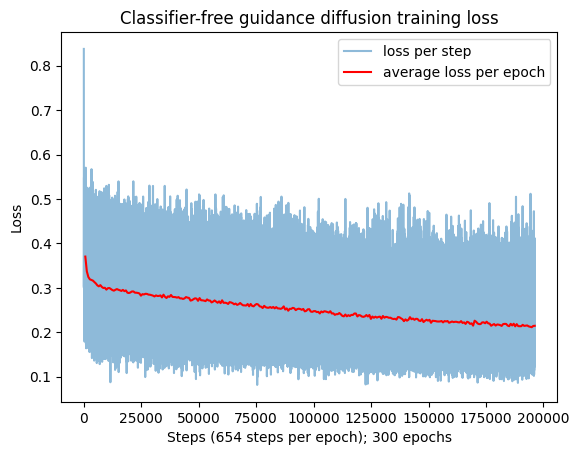

In [34]:
plt.plot(flat_losses, alpha=0.5, label='loss per step')
plt.plot(x_epoch_loss, avg_losses, c='r', label='average loss per epoch')
plt.title("Classifier-free guidance diffusion training loss")
plt.ylabel("Loss")
plt.xlabel(f"Steps ({n_steps_per_epoch} steps per epoch); {n_epochs} epochs")
plt.legend()
plt.savefig(f"{results_folder}/plots/xray-unet-04-29-2023--10-54-training-loss.png")
plt.show()

# TODO: implement this and generate some data to use for training classifiers

In [59]:
def save_generated_images_w_labels(n_images, images_per_step, diffusion, label_map, start_idxs, data_dir, cond_scale=3.):
    n_classes = len(label_map)
    imgs_generated_per_class = {
        class_idx: start_idxs[class_idx] for class_idx in range(n_classes)
    }
    for _ in range(n_images // images_per_step):
        sampled_images, image_classes = th.sample_n_images(diffusion, images_per_step, n_classes, cond_scale)
        # Convert image_classes to list of ints
        image_classes = [int(x) for x in image_classes]
        for image, label in zip(sampled_images, image_classes):
            utils.save_image(image, f"{data_dir}/{label_map[label]}/{imgs_generated_per_class[label]}.png")
            imgs_generated_per_class[label] += 1

In [35]:
sampled_images, image_classes = th.sample_n_images(diffusion, 100, 2, 3.)

sampling loop time step: 100%|██████████| 500/500 [03:21<00:00,  2.49it/s]


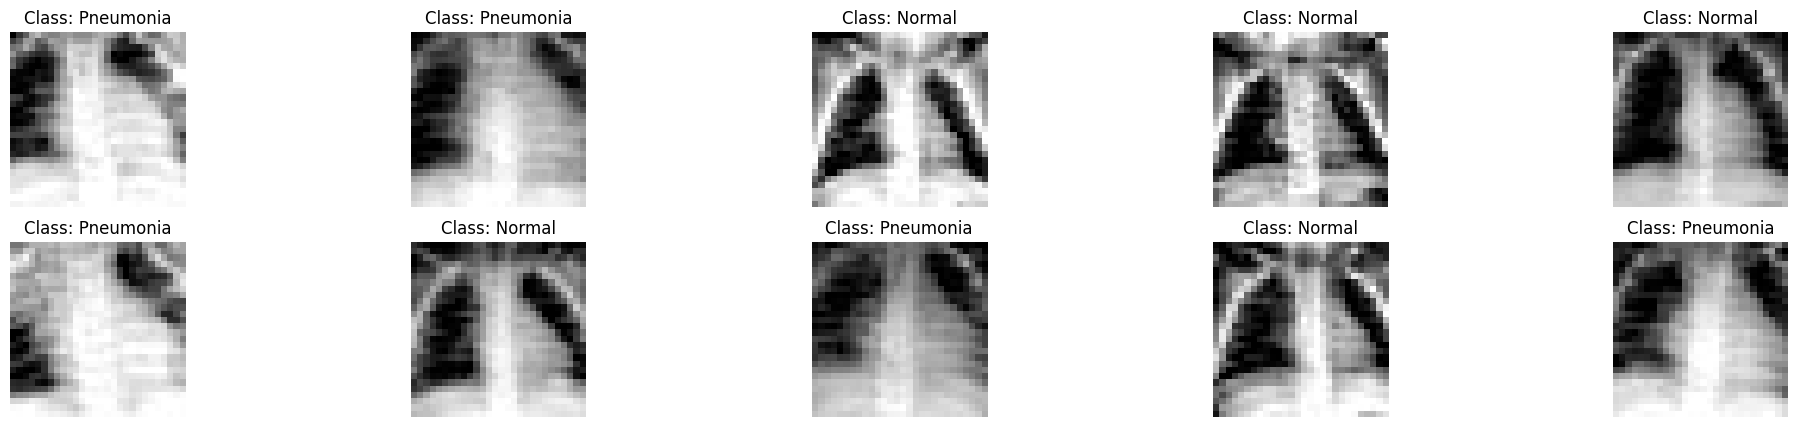

In [38]:
viz.plot_generated_images(sampled_images[:10], image_classes[:10], label_map, show=True)

In [37]:
for j, (image, label) in enumerate(zip(sampled_images, image_classes)):
    utils.save_image(image, f"../data/metric-comparison/xray/diffusion/epochs300-no-augmentation/{label}-{j}.png")

In [41]:
label_map = {
    0: "NORMAL",
    1: "PNEUMONIA"
}

In [ ]:
import glob

data_dir = "../data/diffusion-chest-xray/train"

In [65]:
# Get highest id of currently generated images
highest_normal_id = max([int(p.split("/")[-1].split('.')[0]) for p in glob.glob(f"{data_dir}/{label_map[0]}/*.png")])
highest_pneumonia_id = max([int(p.split("/")[-1].split('.')[0]) for p in glob.glob(f"{data_dir}/{label_map[1]}/*.png")])
highest_normal_id, highest_pneumonia_id
start_idxs = {
    0: highest_normal_id + 1,
    1: highest_pneumonia_id + 1
}
print(f"starting at {start_idxs}")

save_generated_images_w_labels(n_images=4000, images_per_step=100, diffusion=diffusion, start_idxs=start_idxs,
                               label_map=label_map, data_dir=data_dir, cond_scale=3.)

starting at {0: 523, 1: 487}


sampling loop time step: 100%|██████████| 500/500 [03:01<00:00,  2.76it/s]
